## Object Detection Using OpenCV

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

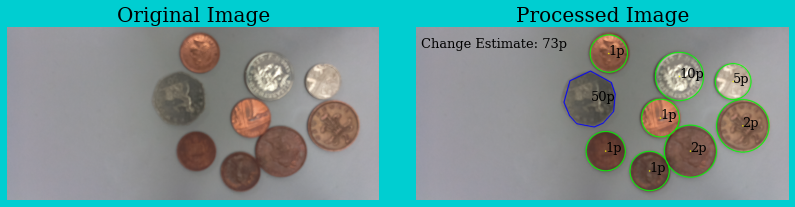

In [2]:
### Detect Circular Coins ###
coins = cv.imread('coins_image.png') # Load image
output = coins.copy() # Create copy of image
gray = cv.cvtColor(coins, cv.COLOR_BGR2GRAY) # Convert image to grayscale 
gray = cv.medianBlur(gray, 5) # Add a median blur so that edges are easier to detect
## Manually tune parameters to dectect coins ##
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 200, param1 = 75, param2 = 50, minRadius = 3, maxRadius = 0) 
detected_circles = np.uint16(np.around(circles)) # Round coordinates so that they can be plotted on output
font_dict = {'family':'serif','color':'black','size': 13}
s = 0 # Keep track of the sum of detected coins
fig = plt.figure(figsize = (14, 10), facecolor = 'darkturquoise') # Create figure in which to store subplots
ax1 = fig.add_subplot(1, 2, 1) # Create subplot for original image
ax2 = fig.add_subplot(1, 2, 2) # Create subplot for processed image
fig.subplots_adjust(wspace = 0.1) # Adjust padding between subplots

for (x, y, r) in detected_circles[0, :]:
    cv.circle(output, (x, y), r, (0, 255, 0), 3) # Draw detected circles around the coins 
    cv.circle(output, (x, y), 2, (0, 255, 255), 3) # Draw tiny circles at the centers of the coins
    ## Classify coins by the values of their radii ##
    if r < 95:
        ax2.text(x, y, "5p", fontdict = font_dict)
        s += 5
    elif r < 105:
        ax2.text(x, y, "1p", fontdict = font_dict)
        s += 1
    elif r < 125:
        ax2.text(x, y, "10p", fontdict = font_dict)
        s += 10
    else:
        ax2.text(x, y, "2p", fontdict = font_dict)
        s += 2

### Detect Noncircular Coin ###        
_, thresh = cv.threshold(gray, 108, 250, cv.THRESH_BINARY) # Manually tune threshold parameters
contours, _ = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) # Find contours in image

for contour in contours:
    area = cv.contourArea(contour)
    if area > 150: # Filter on area of contours
        approx = cv.approxPolyDP(contour, 0.01 * cv.arcLength(contour, True), True) # Approximate shapes of polygons 
        if len(approx) == 10: # Filter on number of contours in approximated polygons
            cv.drawContours(output, [approx], 0, (255, 0, 0), 3) # Draw contours around the noncircular coin
            break
x = approx.ravel()[0]
y = approx.ravel()[1] + 150
ax2.text(x, y, "50p", fontdict = font_dict) # Plot value at the center of the noncircular coin       
s += 50        
ax2.text(25, 100, f"Change Estimate: {s}p", fontdict = font_dict)

### Plot Processed Image Beside Original Image ### 
coins = cv.cvtColor(coins, cv.COLOR_BGR2RGB)
output = cv.cvtColor(output, cv.COLOR_BGR2RGB) #Convert images from BGR format to RBG format
axs = [ax1, ax2]
titles = ['Original Image', 'Processed Image']
images = [coins, output]

for i in range(2):
    axs[i].imshow(images[i])
    axs[i].set_title(titles[i], fontdict = {'family':'serif','color':'black','size': 20})
    axs[i].set_axis_off()
    
fig.savefig('coins_total.png', dpi = 300, facecolor = fig.get_facecolor(), bbox_inches = 'tight')
plt.show()